# Exploratory Data Analysis (EDA)

## Preprocessing Data

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
df = pd.read_csv('train.csv')

In [359]:
df.shape

(891, 12)

In [360]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [361]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Understanding the type of data

*Categorical Data*
- Survived
- PClass
- Sex
- SibSp (Sibling and Spouse)
- Parch (Parent Child)
- Embarked

*Numerical Data*
- Age
- Fare
- PassengerId

*Mixed Data*
- Name
- Ticket
- Cabin

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [363]:
# Finding null data in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Conclusion*
- Missing values are found in Age, Cabin and Embarked Columns
- More then 70 percent values are missing in cabin columns
- Few columns have wrong datatypes

In [364]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [365]:
# Dropping cabin column
df.drop(columns=['Cabin'],inplace=True)

In [366]:
# Filling missing values with mean values
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [367]:
# finding the most appeared value in embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [368]:
# So S is most appeared that's why filling with S
df['Embarked'].fillna('S', inplace=True)

In [369]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [370]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**Changing Data type of these columns**
- Survived(catergory)
- Pclass(catergory)
- Sex(catergory)
- Age(int)
- Embarked(catergory)

In [371]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [372]:
# verifying
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [373]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62% people died in the accident


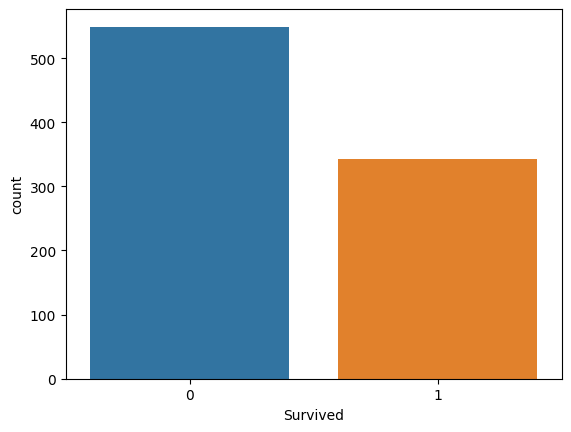

In [374]:
# Univariant Analysis
# Doing first on Survived col
sns.countplot(x='Survived', data=df)
death_percentage = round((df['Survived'].value_counts().values[0] / 891) * 100)

print("Out of 891 {}% people died in the accident".format(death_percentage))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

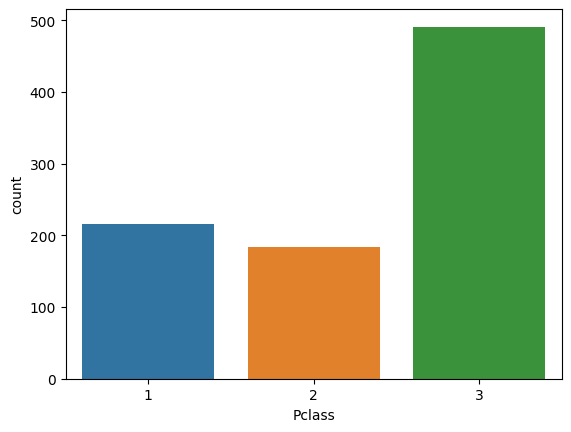

In [375]:
# Pclass column
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass', data=df)

# Conclusion : Pclass 3 was the most crowded class

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

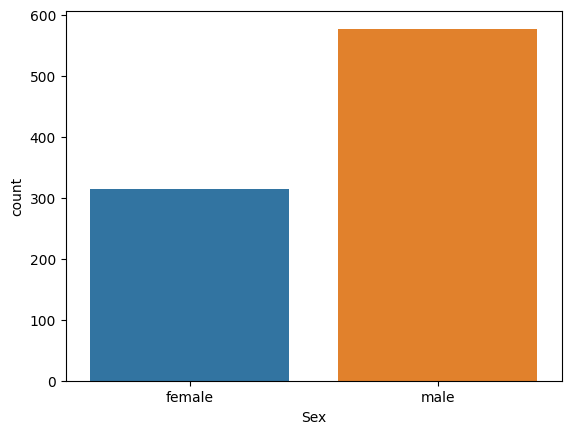

In [376]:
# Sex
print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex', data=df)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

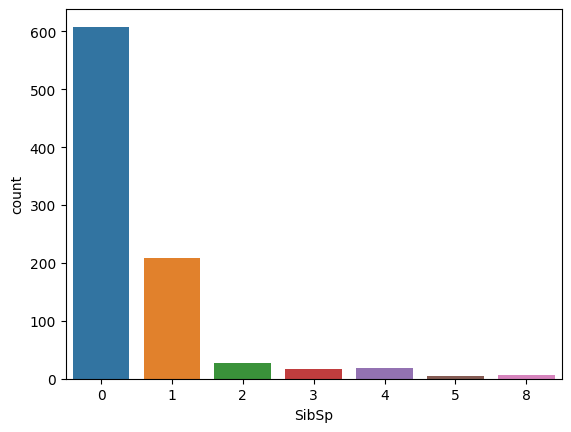

In [377]:
# Sibling Spouse
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp', data=df)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

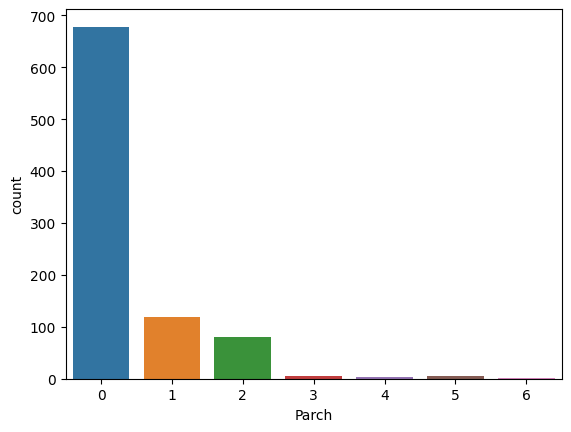

In [378]:
# Parent Child (Parch)
print((df['Parch'].value_counts()/891)*100)
sns.countplot(x='Parch', data=df)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

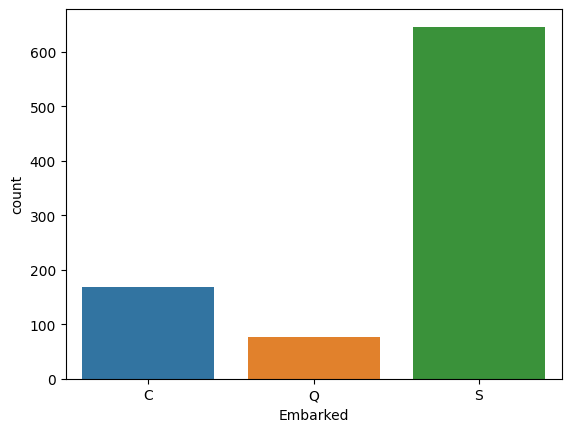

In [379]:
# Embarked
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked', data=df)

C:\Users\alias\AppData\Local\Temp\ipykernel_1388\2390845778.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


0.45956263424701577
0.9865867453652877


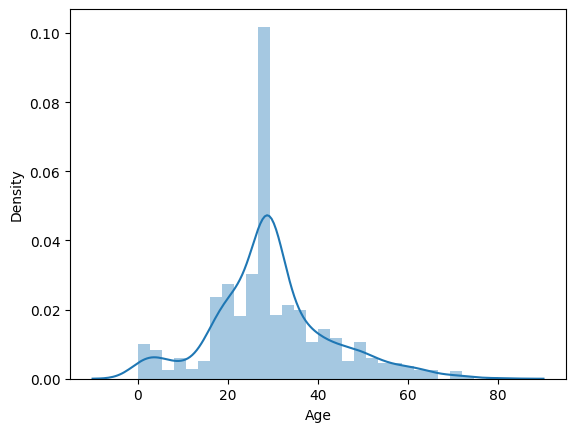

In [380]:
# Age
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())
# Data is close to normal distribution

<Axes: ylabel='Age'>

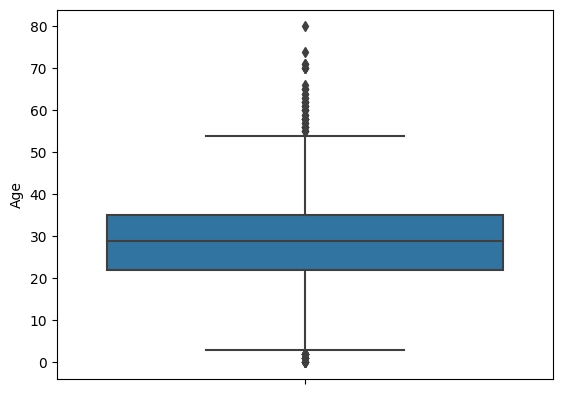

In [381]:
# This will help us to see outliners
sns.boxplot(y='Age', data=df, orient='v')

In [382]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1 are ",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 are  7


**Conclusion**
- Age can be considered as normal distributed
- We will explore outliners afterwards

C:\Users\alias\AppData\Local\Temp\ipykernel_1388\2942046018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

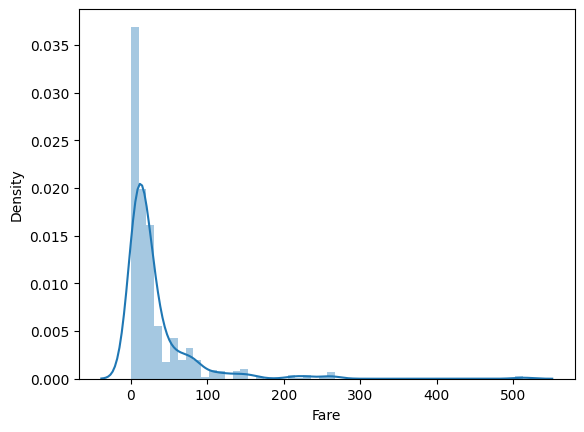

In [383]:
# Fare column
sns.distplot(df['Fare'])

In [384]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: >

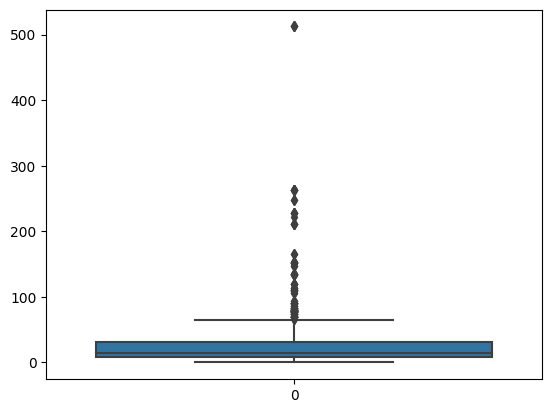

In [385]:
sns.boxplot(df['Fare'])

In [386]:
print("People with fare in between $200 and $300 =",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300 =",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 = 17
People with fare in greater than $300 = 3


**Conclusion for Fare**
- Data is highly skewed as alot of people bought cheaper tickets
- Outliners are in the data

## Multivariant Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


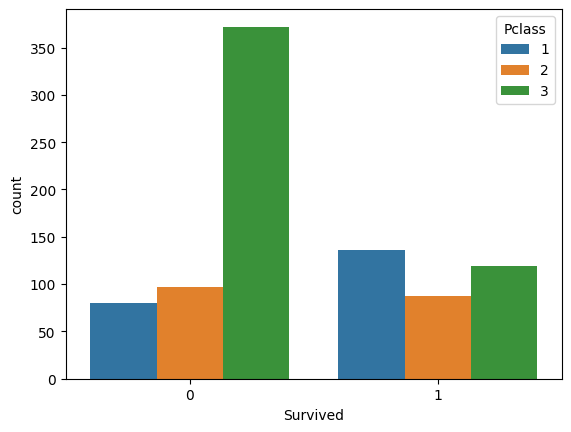

In [387]:
# Survival + PClass
sns.countplot(x='Survived', hue='Pclass', data=df)
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


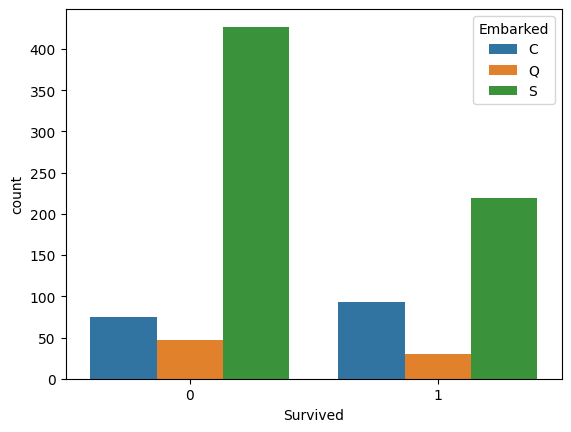

In [388]:
# Survival with Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

C:\Users\alias\AppData\Local\Temp\ipykernel_1388\1147318021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\alias\AppData\Local\Temp\ipykernel_1388\1147318021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

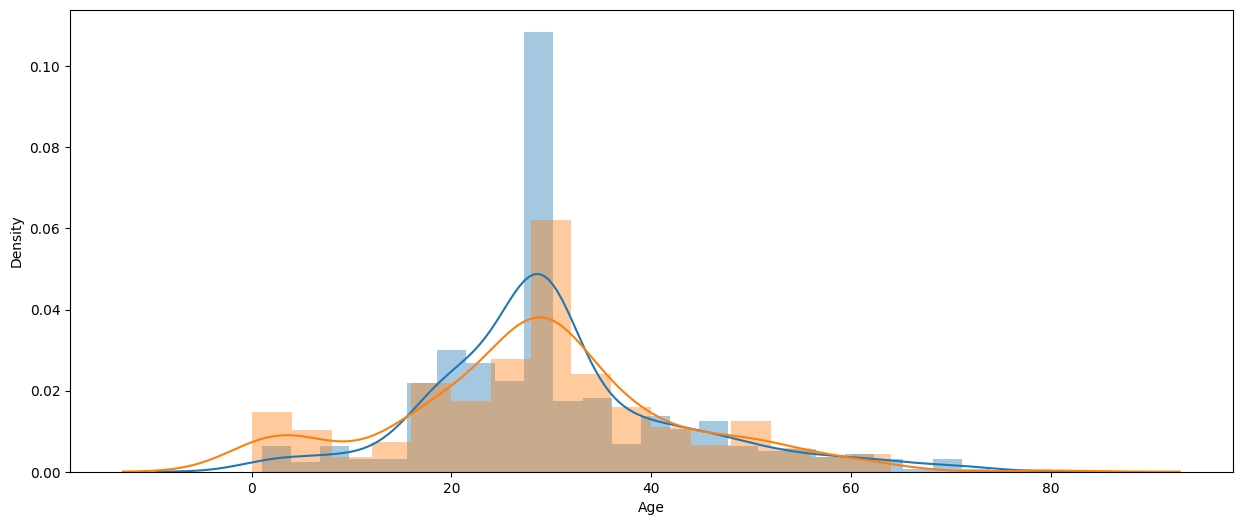

In [389]:
# Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\alias\AppData\Local\Temp\ipykernel_1388\1060383329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\alias\AppData\Local\Temp\ipykernel_1388\1060383329.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

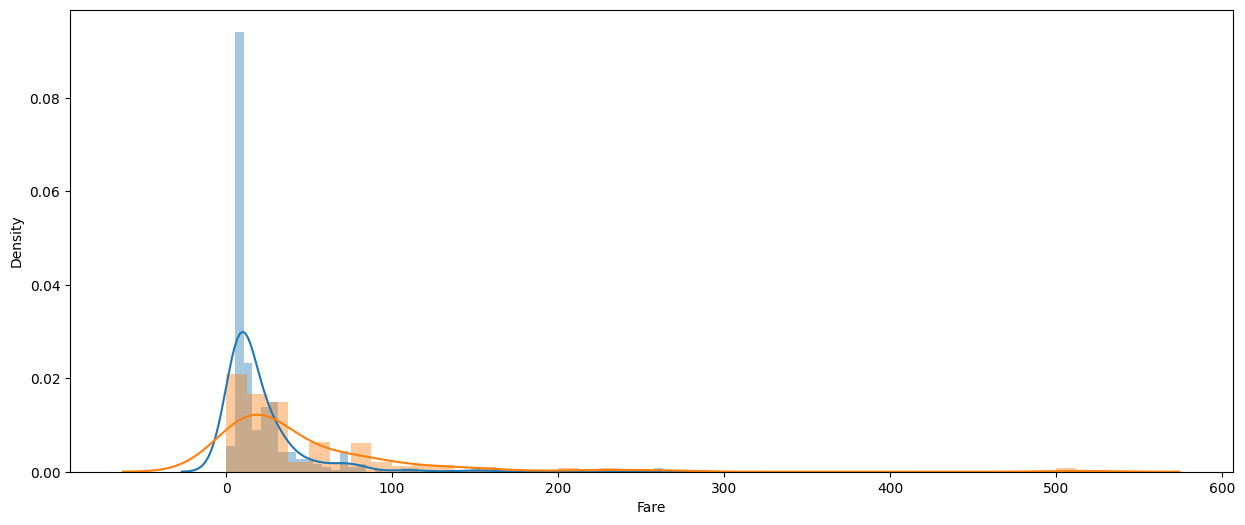

In [390]:
# Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

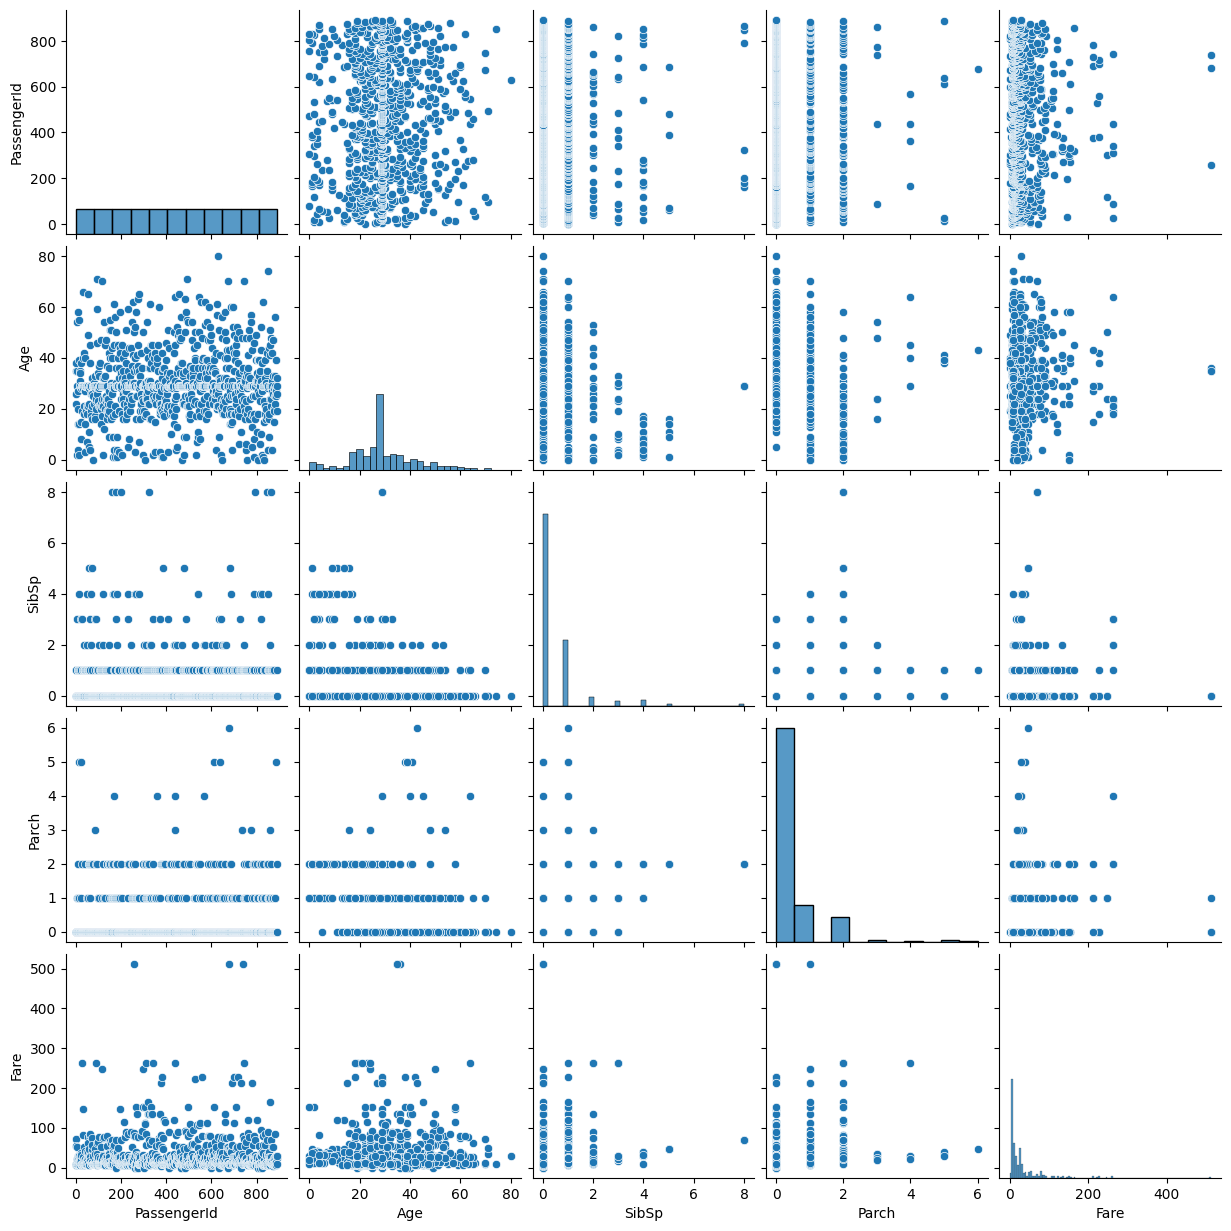

In [391]:
sns.pairplot(df)

C:\Users\alias\AppData\Local\Temp\ipykernel_1388\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

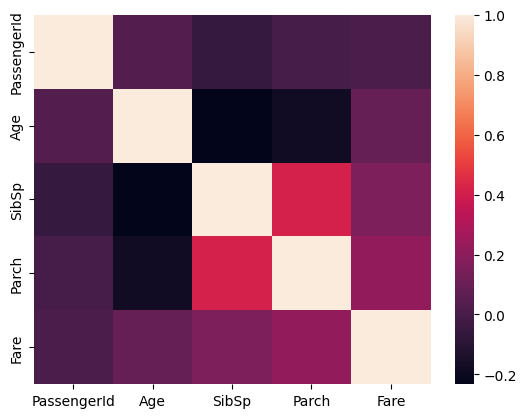

In [392]:
sns.heatmap(df.corr())

In [393]:
# Feature Engineering
# We will create a new column by the name of family which will be the sum of SibSp and Parch cols
df['family_size']=df['Parch'] + df['SibSp']

In [394]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
50,51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,S,5
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3,4,2,347077,31.3875,S,6
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.2750,S,6
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29,0,0,239853,0.0000,S,0
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,29,0,0,370375,7.7500,Q,0


In [395]:
# Now we will enginner a new feature by the name of family type
def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [396]:
df['family_type']=df['family_size'].apply(family_type)

In [397]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
215,216,1,1,"Newell, Miss. Madeleine",female,31,1,0,35273,113.2750,C,1,Medium
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36,1,0,345572,17.4000,S,1,Medium
138,139,0,3,"Osen, Mr. Olaf Elon",male,16,0,0,7534,9.2167,S,0,Alone
21,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0000,S,0,Alone
602,603,0,1,"Harrington, Mr. Charles H",male,29,0,0,113796,42.4000,S,0,Alone


In [398]:
# Dropping SibSp, Parch and family_size
df.drop(columns=['SibSp','Parch','family_size', 'Ticket', 'PassengerId', 'Name'],inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

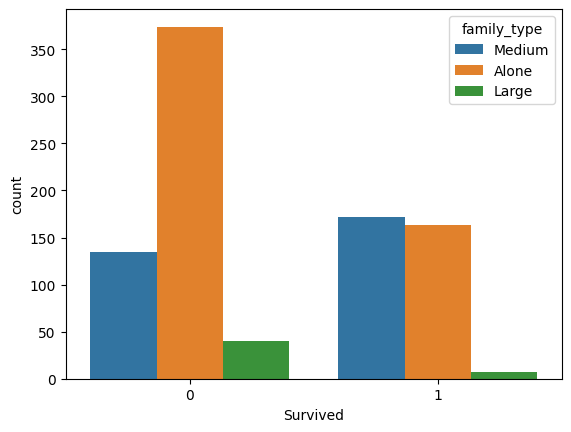

In [399]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)
sns.countplot(x='Survived', hue='family_type', data=df)

## Detecting Outliners

### Numerical Data
- If the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier.
- If the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical Data
-If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [400]:
# handling outliers in age(Almost normal)
df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 7)

In [401]:
# handling outliers from Fare column

# Finding quartiles
Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [402]:
df.sample(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_type
359,1,3,female,29,7.8792,Q,Alone
481,0,2,male,29,0.0000,S,Alone
614,0,3,male,35,8.0500,S,Alone
17,1,2,male,29,13.0000,S,Alone


In [403]:
# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22,7.2500,0,1,1,0,1,0,1
2,1,26,7.9250,0,1,0,0,1,0,0
3,1,35,53.1000,0,0,0,0,1,0,1
4,0,35,8.0500,0,1,1,0,1,0,0
5,0,29,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27,13.0000,1,0,1,0,1,0,0
887,1,19,30.0000,0,0,0,0,1,0,0
888,0,29,23.4500,0,1,0,0,1,0,1
889,1,26,30.0000,0,0,1,0,0,0,0


In [404]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

C:\Users\alias\AppData\Local\Temp\ipykernel_1388\98044397.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='summer')


<Axes: >

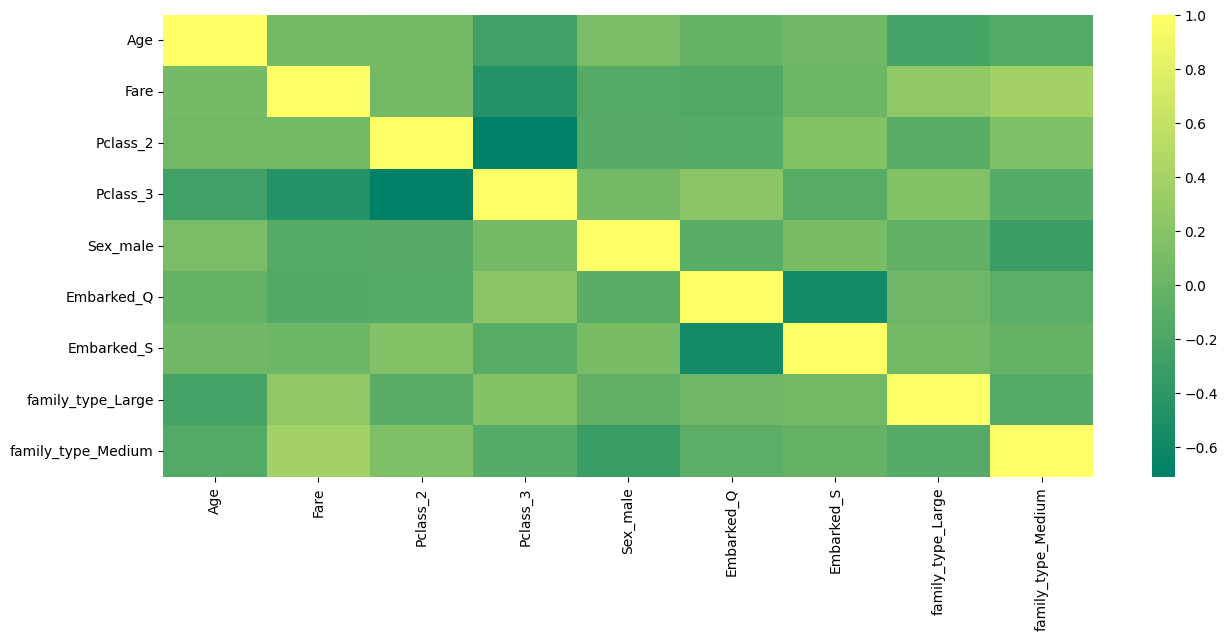

In [405]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')

In [406]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22,7.2500,0,1,1,0,1,0,1
2,1,26,7.9250,0,1,0,0,1,0,0
3,1,35,53.1000,0,0,0,0,1,0,1
4,0,35,8.0500,0,1,1,0,1,0,0
5,0,29,8.4583,0,1,1,1,0,0,0


In [407]:
df.shape

(769, 10)

**NOW OUR DATA IS CLEANED!**

**We will be using 4 classification algorithms:**
- Logistic Regression
- Decision Tree
- Neural Network
- KNN

In [430]:
X = df[['Age','Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'family_type_Large', 'family_type_Medium']]
y = df[['Survived']]

#### Splitting Data in train and test

In [431]:
from sklearn.model_selection import train_test_split

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Logistic Regression

In [433]:
from sklearn.linear_model import LogisticRegression

In [434]:
lr = LogisticRegression()

In [435]:
lr.fit(X_train, y_train)
lr_predict= lr.predict(X_test)
lr_predict

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [436]:
from sklearn.metrics import confusion_matrix

In [437]:
pd.DataFrame(confusion_matrix(y_test, lr_predict),columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,138,33
Actual Yes,16,44


In [438]:
from sklearn.metrics import classification_report, accuracy_score

In [439]:
report = classification_report(y_test, lr_predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       171
           1       0.57      0.73      0.64        60

    accuracy                           0.79       231
   macro avg       0.73      0.77      0.75       231
weighted avg       0.81      0.79      0.80       231



In [440]:
accuracy=accuracy_score(y_test,lr_predict)
accuracy

0.7878787878787878

### Decision Tree

In [441]:
df

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22,7.2500,0,1,1,0,1,0,1
2,1,26,7.9250,0,1,0,0,1,0,0
3,1,35,53.1000,0,0,0,0,1,0,1
4,0,35,8.0500,0,1,1,0,1,0,0
5,0,29,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27,13.0000,1,0,1,0,1,0,0
887,1,19,30.0000,0,0,0,0,1,0,0
888,0,29,23.4500,0,1,0,0,1,0,1
889,1,26,30.0000,0,0,1,0,0,0,0


In [442]:
dt_df = df
inputs = dt_df.drop('Survived', axis='columns')

In [443]:
target = dt_df['Survived']

In [444]:
inputs

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,22,7.2500,0,1,1,0,1,0,1
2,26,7.9250,0,1,0,0,1,0,0
3,35,53.1000,0,0,0,0,1,0,1
4,35,8.0500,0,1,1,0,1,0,0
5,29,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
886,27,13.0000,1,0,1,0,1,0,0
887,19,30.0000,0,0,0,0,1,0,0
888,29,23.4500,0,1,0,0,1,0,1
889,26,30.0000,0,0,1,0,0,0,0


In [445]:
from sklearn import tree

In [446]:
model = tree.DecisionTreeClassifier()
model.fit(inputs, target)

DecisionTreeClassifier()

In [447]:
model.score(inputs, target)

0.9726918075422627

In [448]:
y_pred_dt = model.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### K Nearest Neighbour

In [449]:
df.head(1)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22,7.25,0,1,1,0,1,0,1


In [450]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [451]:
knn.fit(X_train, y_train)

C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [452]:
knn.score(X_test, y_test)

0.7142857142857143

In [453]:
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[140,  31],
       [ 35,  25]], dtype=int64)

In [454]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

Text(0.5, 25.722222222222214, 'Actual')

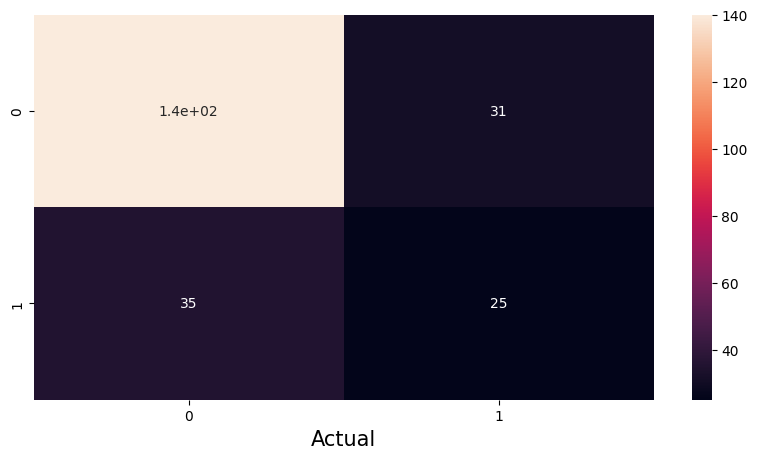

In [455]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted', fontsize=15)
plt.xlabel('Actual', fontsize=15)

### Neural Network

In [456]:
import keras 
from keras.models import Sequential # For ANN
from keras.layers import Dense # For Layers    

In [457]:
from sklearn.preprocessing import StandardScaler

In [458]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [459]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [460]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [461]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
17/17 [==============================] - 3s 35ms/step - loss: 0.6278 - accuracy: 0.6747 - val_loss: 0.5645 - val_accuracy: 0.7749
Epoch 2/20
17/17 [==============================] - 0s 10ms/step - loss: 0.5360 - accuracy: 0.7639 - val_loss: 0.4907 - val_accuracy: 0.7922
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.4907 - accuracy: 0.7881 - val_loss: 0.4477 - val_accuracy: 0.7965
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 0.4661 - accuracy: 0.7955 - val_loss: 0.4408 - val_accuracy: 0.7792
Epoch 5/20
17/17 [==============================] - 0s 11ms/step - loss: 0.4541 - accuracy: 0.7993 - val_loss: 0.4266 - val_accuracy: 0.7792
Epoch 6/20
17/17 [==============================] - 0s 10ms/step - loss: 0.4454 - accuracy: 0.8067 - val_loss: 0.4221 - val_accuracy: 0.7792
Epoch 7/20
17/17 [==============================] - 0s 14ms/step - loss: 0.4400 - accuracy: 0.8086 - val_loss: 0.4151 - val_accuracy: 0.7835
Epoch 8/20
17

In [462]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

8/8 [==============================] - 0s 5ms/step - loss: 0.4149 - accuracy: 0.8009
Accuracy: 80.09%


In [463]:
y_pred_ann = model.predict(X_test)
predict= np.round(y_pred_ann)
confusion_matrix(y_test,predict)
print('\n')
print(classification_report(y_test,predict))

8/8 [==============================] - 0s 4ms/step


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       171
           1       0.60      0.68      0.64        60

    accuracy                           0.80       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.81      0.80      0.80       231



## FINAL CONCLUSION

In [464]:
from sklearn.metrics import roc_curve, auc

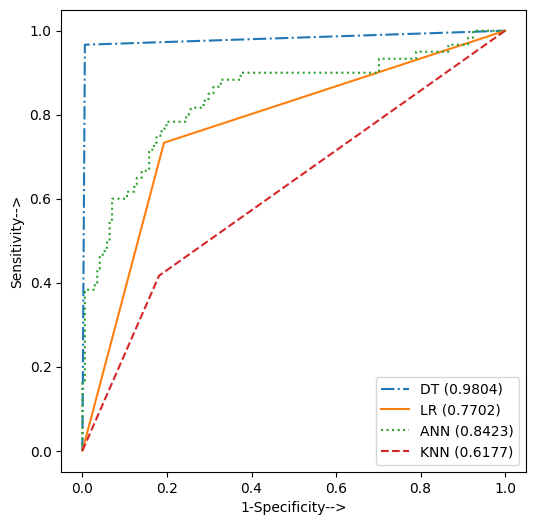

In [468]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, lr_predict)
g_fpr, g_tpr, threshold2 = roc_curve(y_test, y_pred_dt)
e_fpr, e_tpr, threshold3 = roc_curve(y_test, y_pred_knn)
s_fpr, s_tpr, threshold4 = roc_curve(y_test, y_pred_ann)


auc_l = auc(l_fpr, l_tpr)
auc_g = auc(g_fpr, g_tpr)
auc_e = auc(e_fpr, e_tpr)
auc_s = auc(s_fpr, s_tpr)


plt.figure(figsize=(6,6), dpi=100)
plt.plot(g_fpr, g_tpr, linestyle='-.', label='DT (%.4f)' %auc_g)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='ANN (%.4f)' %auc_s)
plt.plot(e_fpr, e_tpr, linestyle='--', label='KNN (%.4f)' %auc_e)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()